In [29]:
# this is the the main file for  lstm case the spectral project
# NB case of the data with two polarisations

import pandas as pd
import os
import datetime
import tensorboard

from model_building_and_training_module import lstm_wrapper_gen_2
from model_building_and_training_module import *
from model_building_and_training_module import lstm_wrapper_gen_2_with_callbacks
from specific_module_v2 import *
from support_module import clustering_support
from support_module import input_output_analysis_wrapper
#from validation_module import test_model_with_output
from validation_module import goodness_descriptor
from support_module import rho2labels

In [30]:
katse_nr = 1
order = 1
dx = 5
path = '/Users/svennomm/kohalikTree/Data/AIRSCS/wave/data_v2/'
#path = '/illukas/data/projects/airscs/svens_experiments/processed_by_sven/' # case of ai lab
initial_data_train, initial_data_valid, initial_data_test, target_data_train, target_data_valid, target_data_test, valid_index, test_index = combine_katsed(path, katse_nr, order)

Aloha! Performing initial formatting
Initial  formatting has been completed!
Aloha! Performing initial formatting
Initial  formatting has been completed!
Hello, this is splitting wrapper!
Splitting has been completed.
Hello, this is splitting wrapper!
Splitting has been completed.


In [31]:
# apply clustering and see
intial_data_cluster, target_data_cluster = clustering_support(initial_data_train, target_data_train)

KeyboardInterrupt: 

In [ ]:
def lstm_wrapper_gen_2_with_callbacks_output(initial_data_train, initial_data_valid, initial_data_test,
                                             target_data_train, target_data_valid, target_data_test, valid_index,
                                             test_index, path, data_name, epochs_nr):

    print("Aloha! this is lstm_wrapper!!!")

    np.set_printoptions(precision=3, suppress=True)
    print(tf.__version__)

    start_time = datetime.datetime.now()
    model_name = 'lstm_' + data_name + '_' + str(epochs_nr) + '_epoch_' + start_time.strftime("%m_%d_%Y_%H_%M_%S")
    full_model_name = path + model_name

    lstm_model = train_model_with_with_callbacks(initial_data_train, target_data_train, initial_data_valid,
                                                 target_data_valid, epochs_nr, path)
    lstm_model.save(full_model_name)

    #test_model_with_output(initial_data_test, target_data_test, lstm_model, test_index, path, data_name, model_name)
    print("Uhhh managed the task")
    return lstm_model


In [ ]:
model_path = path + 'models/'
data_name = 'katse_0' + str(katse_nr) + '_0' + str(katse_nr+1)
lstm_model = lstm_wrapper_gen_2_with_callbacks_output(initial_data_train, initial_data_valid, initial_data_test, target_data_train, target_data_valid, target_data_test,valid_index, test_index, path, data_name, epochs_nr=2500)

In [108]:
def test_model_with_output(test_x, test_y, model, test_index, path, data_name, model_name):
    print("Testing LSTM model!")
    #test_x = apply_log(test_x)
    #test_y = apply_log(test_y)
    test_x = test_x.to_numpy()
    test_y = test_y.to_numpy()

    rows, cols = test_y.shape
    test_x = test_x.reshape(rows, cols, 1)

    y_hat = model.predict(test_x, batch_size=2, verbose=0)
    goodness_descriptors = []
    print(rows)
    for i in range(0, rows):
        mse, rho, max_test, max_hat, delta_max_val, delta_max_loc = goodness_descriptor(test_y[i, :], y_hat[i, :])
        goodness_descriptors.append([int(test_index[i]), mse, rho, max_test, max_hat, delta_max_val, delta_max_loc])

        #print("Testing for datapoint", test_index.loc[i])
        #y_ampl = np.abs(np.max(test_y[i, :]) - np.min(test_y[i, :]))
        #residuals_nn = (test_y[i, :] - y_hat[i, :]) / y_ampl

        #fig2, axis = plt.subplots()
        #plt.plot(test_y[i, :], color='blue')
        #plt.plot(y_hat[i, :], color='orange')
        #plt.title("validation for", str(test_index.loc[i]))
        #plt.show()

        #fig3, axis = plt.subplots()
        #plt.plot(residuals_nn, color='green')
        #plt.title("residuals for a small set")
        #plt.show()
    goodness_descriptors = np.array(goodness_descriptors)
    columns = ['index', 'mse', 'rho', 'max_test', 'max_hat', 'delta_max_val', 'delta_max_loc']
    print(columns)
    print("Average values are: ", np.average(goodness_descriptors, axis=0))

    goodness_descriptors = pd.DataFrame(goodness_descriptors, columns=columns)
    rho_labels = rho2labels(goodness_descriptors)
    rho_labels = np.array(rho_labels)

    #fig, ax = plt.subplots()
    #plt.axis('off')
    #plt.plot(rho_labels)
    #plt.show()
    #print(rho_labels)
    #color_list = np.array([[213,62,79], [244,109,67], [253,174,97], [254,224,139], [255,255,191], [230,245,152],
    #                      [171,221,164], [102,194,165], [50,136,189]]) / 255

    #color_list = np.array([[166,206,227], [31,120,180], [178,223,138], [51,160,44], [251,154,153], [227,26,28],
    #                       [253,191,111], [255,127,0], [202,178,214]]) / 255

    #color_list = np.array([[213,62,79], [252,141,89], [254,224,139], [255,255,191], [230,245,152], [153,213,148],[50,136,189]]) / 255



    color_list = np.array([[255,255,178], [254,217,118], [254,178,76], [253,141,60], [252,78,42], [227,26,28], [177,0,38]]) / 255
    fig, ax = plt.subplots()
    plt.axis('off')
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    lables = ["$\\rho \leq 0.7$", "$0.7<\\rho \leq 0.75$", "$0.75< \\rho \leq0.8$", "$0.8 <\\rho \leq 0.85$", "$0.85 <\\rho \leq 0.9$", "$0.9 < \\rho  \leq 0.95$", "$\\rho > 0.95$"]

    for k in range(0, np.max(rho_labels)+1):
        #kk = np.max(rho_labels) - (kk + 1)
        #k = np.max(rho_labels) - kk
        #print(k)
        selected_rows = np.where(rho_labels == k)
        print("Cluster: ", k, " contains: ", len(selected_rows[0]), " observation points.")

        for i in range(0, len(selected_rows[0])):
            # title('Clustered initial data')
            if i == len(selected_rows[0]) - 1:
                ax1.plot(test_x[selected_rows[0][i], :], color=color_list[k], alpha=0.1 * (np.max(rho_labels)+1-k), linewidth=0.9,
                               label=str(rho_labels[selected_rows[0][i]]))
                ax2.plot(test_y[selected_rows[0][i], :], color=color_list[k], alpha=0.1 * (np.max(rho_labels)+1-k), linewidth=0.9,
                               label=str(rho_labels[selected_rows[0][i]]))
                print(k, np.max(rho_labels)+1-k, rho_labels[selected_rows[0][i]])
            else:
                ax1.plot(test_x[selected_rows[0][i], :], color=color_list[k], alpha=0.1 * (np.max(rho_labels)+1-k), linewidth=0.9,)
                ax2.plot(test_y[selected_rows[0][i], :], color=color_list[k], alpha=0.1 * (np.max(rho_labels)+1-k), linewidth=0.9)

    ax1.set_xticks([])
    ax2.set_xticks([])
    handles_1, labels_1 = ax1.get_legend_handles_labels()
    handles_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(handles_1, lables)
    ax2.legend(handles_2, lables)
    #ax2.legend()
    plt.show()

    time = datetime.datetime.now()
    #path = return_model_path()
    goodness_file_name = path + 'validation_of_' + model_name + '_on' + data_name + '.csv'
    goodness_descriptors.to_csv(goodness_file_name, index=False)
    print("LSTM model has been tested! ")
    return  goodness_descriptors

Testing LSTM model!
2365
['index', 'mse', 'rho', 'max_test', 'max_hat', 'delta_max_val', 'delta_max_loc']
Average values are:  [5660.541    0.66     0.755   27.959   27.579    0.945    0.38 ]
Cluster:  0  contains:  599  observation points.
0 7 0
Cluster:  1  contains:  53  observation points.
1 6 1
Cluster:  2  contains:  48  observation points.
2 5 2
Cluster:  3  contains:  93  observation points.
3 4 3
Cluster:  4  contains:  112  observation points.
4 3 4
Cluster:  5  contains:  193  observation points.
5 2 5
Cluster:  6  contains:  1267  observation points.
6 1 6


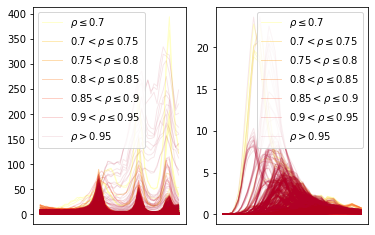

LSTM model has been tested! 


,index,mse,rho,max_test,max_hat,delta_max_val,delta_max_loc
0,1149.0,0.287297,0.916943,24.0,28.0,0.546856,-4.0
1,10069.0,0.283158,0.671039,24.0,28.0,0.503823,-4.0
2,2164.0,0.758054,0.995944,21.0,21.0,1.765803,0.0
3,8138.0,0.156935,0.762172,32.0,28.0,-0.063674,4.0
4,3919.0,0.240048,0.865393,42.0,36.0,0.437019,6.0
...,...,...,...,...,...,...,...
2360,1648.0,0.328565,0.719039,42.0,32.0,0.566982,10.0
2361,1234.0,0.277387,-0.089365,45.0,29.0,0.513760,16.0
2362,8144.0,0.218525,-0.793460,20.0,36.0,0.371423,-16.0
2363,6791.0,0.517749,0.971563,36.0,36.0,1.576160,0.0


In [109]:
model_name = 'xxx'
test_model_with_output(initial_data_valid, target_data_valid, lstm_model, test_index, path, data_name, model_name)